In [ ]:
pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=7382634ef1842a7d8252d4256790fdeeeb9a9ee46664e966faf4de0e2d217b35
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

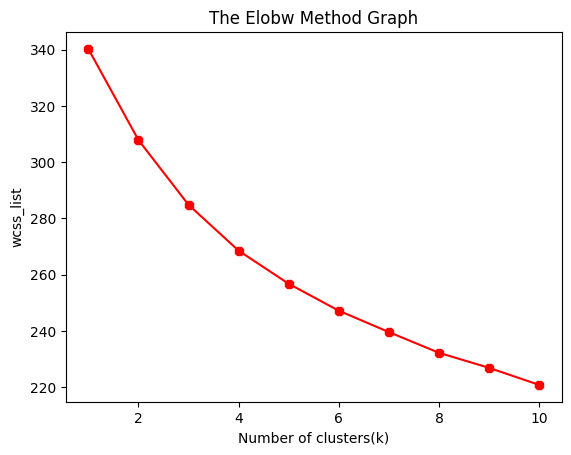

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


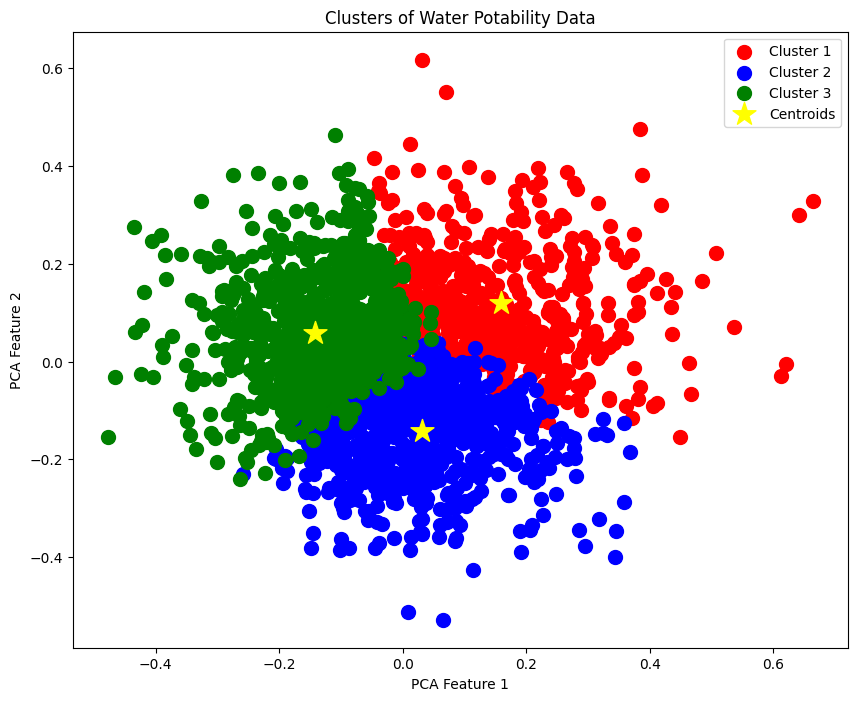

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the dataset
data = pd.read_csv('water_potability.csv')

# Preprocess the data
data = data.dropna()

# Feature scaling
scaler = MinMaxScaler()
x = scaler.fit_transform(data.drop('Potability', axis=1))

#finding optimal number of clusters using the elbow method
from sklearn.cluster import KMeans
wcss_list= []  #Initializing the list for the values of WCSS

#Using for loop for iterations from 1 to 10.
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss_list,color="red", marker ="8")
plt.title('The Elobw Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()

#training the K-means model on a dataset
kmeans = KMeans(n_clusters=3, init='k-means++', random_state= 42)
y_predict= kmeans.fit_predict(x)

#adding the labels to a column named label
data["label"] = y_predict
#The new dataframe with the clustering done
data.head()

# Reduce the dimensions of the data to 2D using PCA
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(x)

# Visualizing the clusters
plt.figure(figsize=(10, 8))
colors = ['red', 'blue', 'green', 'cyan', 'magenta', 'yellow', 'black', 'purple', 'orange', 'brown']
for i in range(3):
    plt.scatter(data_reduced[y_predict == i, 0], data_reduced[y_predict == i, 1],
                s=100, c=colors[i], label=f'Cluster {i+1}')

# Plotting the centroids
centroids = kmeans.cluster_centers_
centroids_reduced = pca.transform(centroids)
plt.scatter(centroids_reduced[:, 0], centroids_reduced[:, 1],
            s=300, c='yellow', marker='*', label='Centroids')

plt.title('Clusters of Water Potability Data')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x, y_predict) # Use the cluster labels as target

from lime.lime_tabular import LimeTabularExplainer
explainer = LimeTabularExplainer(x, feature_names=data.drop('Potability', axis=1).columns,
                                 class_names=[str(i) for i in range(3)],
                                 discretize_continuous=True)

# Explain the prediction for a specific instance using the classifier
instance_index = 0
exp = explainer.explain_instance(x[instance_index], clf.predict_proba, num_features=5) # Use predict_proba
exp.show_in_notebook(show_table=True, show_all=False)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

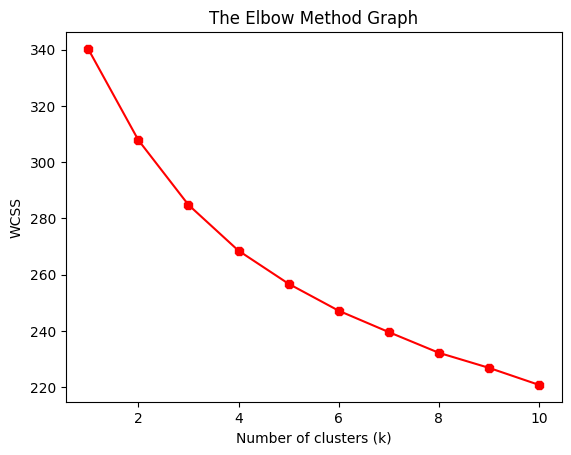

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


          ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
3   8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4   9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   
5   5.584087  188.313324  28748.687739     7.544869  326.678363    280.467916   
6  10.223862  248.071735  28749.716544     7.513408  393.663396    283.651634   
7   8.635849  203.361523  13672.091764     4.563009  303.309771    474.607645   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  label  
3       18.436524       100.341674   4.628771           0      1  
4       11.558279        31.997993   4.075075           0      1  
5        8.399735        54.917862   2.559708           0      0  
6       13.789695        84.603556   2.672989           0      2  
7       12.363817        62.798309   4.401425           0      1  


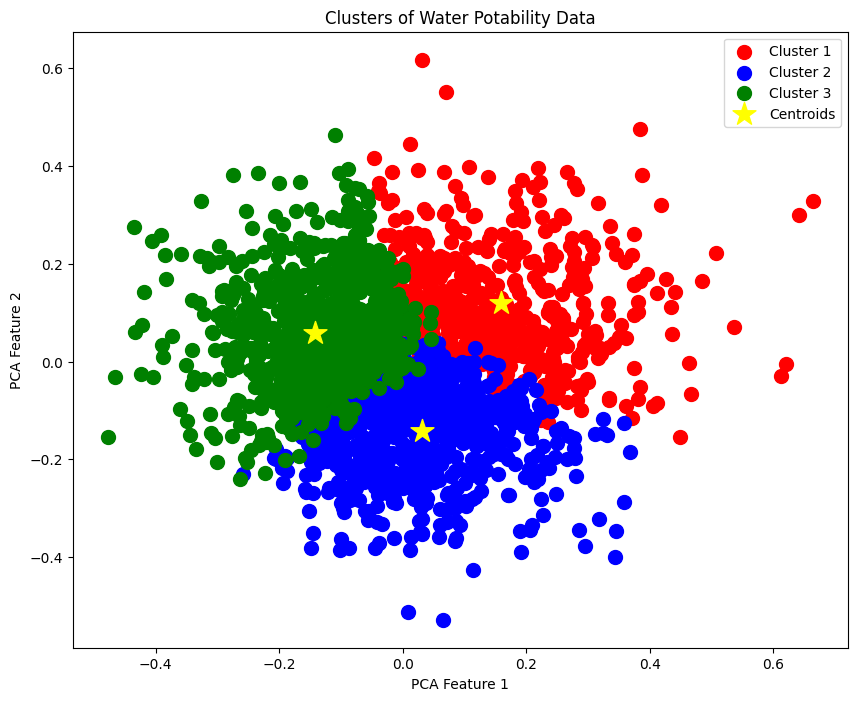


Explanation for instance 2 in Cluster 1:



Explanation for instance 0 in Cluster 2:



Explanation for instance 3 in Cluster 3:


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from lime.lime_tabular import LimeTabularExplainer

# Load the dataset
data = pd.read_csv('water_potability.csv')

# Preprocess the data
data = data.dropna()

# Feature scaling
scaler = MinMaxScaler()
x = scaler.fit_transform(data.drop('Potability', axis=1))

# Finding optimal number of clusters using the elbow method
wcss_list = []  # Initializing the list for the values of WCSS

# Using for loop for iterations from 1 to 10.
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss_list, color="red", marker="8")
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

# Training the K-means model on a dataset
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_predict = kmeans.fit_predict(x)

# Adding the labels to a column named label
data["label"] = y_predict

# The new dataframe with the clustering done
print(data.head())

# Reduce the dimensions of the data to 2D using PCA
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(x)

# Visualizing the clusters
plt.figure(figsize=(10, 8))
colors = ['red', 'blue', 'green']
for i in range(3):
    plt.scatter(data_reduced[y_predict == i, 0], data_reduced[y_predict == i, 1],
                s=100, c=colors[i], label=f'Cluster {i+1}')

# Plotting the centroids
centroids = kmeans.cluster_centers_
centroids_reduced = pca.transform(centroids)
plt.scatter(centroids_reduced[:, 0], centroids_reduced[:, 1],
            s=300, c='yellow', marker='*', label='Centroids')

plt.title('Clusters of Water Potability Data')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend()
plt.show()

# Using LIME to explain cluster assignments - MODIFIED SECTION
explainer = LimeTabularExplainer(x, feature_names=data.drop('Potability', axis=1).columns,
                                 class_names=[str(i) for i in range(3)],
                                 discretize_continuous=True)

# Choose an instance from each cluster to explain
instances_to_explain = []

for cluster in range(3):
    instance_idx = np.where(y_predict == cluster)[0][0]  # Pick the first instance from each cluster
    instances_to_explain.append(instance_idx)

# Define a function to predict cluster probabilities (workaround for KMeans)
def predict_proba(instances):
    distances = kmeans.transform(instances)  # Calculate distances to centroids
    # Convert distances to probabilities (using softmax)
    probabilities = np.exp(-distances) / np.sum(np.exp(-distances), axis=1, keepdims=True)
    return probabilities

# Explain each instance using the predict_proba function
for i, instance_idx in enumerate(instances_to_explain):
    print(f"\nExplanation for instance {instance_idx} in Cluster {i+1}:")
    exp = explainer.explain_instance(x[instances_to_explain[i]], predict_proba, num_features=5)
    exp.show_in_notebook(show_table=True, show_all=False)